In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns 

In [17]:
data_set = pd.read_csv("./titanic_train.csv")

In [3]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_set.shape

(891, 12)

In [10]:
summary = data_set.describe()

In [11]:
mean_age = summary.loc["mean", "Age"]

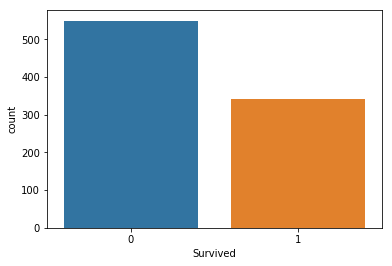

In [5]:
sns.countplot(x = "Survived", data = data_set)

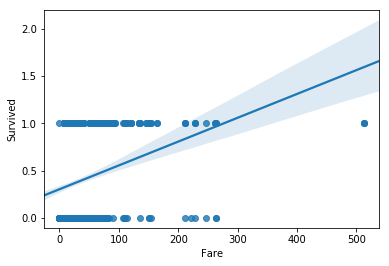

In [6]:
sns.regplot(y="Survived", x="Fare", data=data_set)

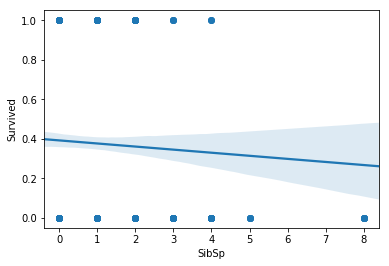

In [7]:
sns.regplot(y="Survived", x="SibSp", data=data_set)

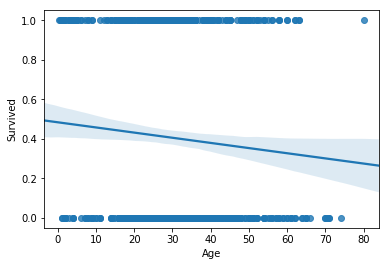

In [8]:
sns.regplot(y="Survived", x="Age", data=data_set)

In [18]:
data_set = data_set.drop(['PassengerId', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis = 1)
data_set.Age.fillna(mean_age,inplace=True)

In [21]:
data_set[data_set.Embarked.isnull()].index

Int64Index([61, 829], dtype='int64')

In [24]:
data_set["Embarked"][61] = "S"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_set['Embarked'])
embarked = le.transform(data_set['Embarked'])
le.fit(data_set['Sex'])
sex = le.transform(data_set['Sex'])

data_set = data_set.drop(['Embarked', 'Sex'], axis = 1)
data_set['Embarked'] = embarked
data_set['Sex'] = sex


TypeError: '<' not supported between instances of 'float' and 'str'